# Importação de Módulos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o Dataset

A importação do dataset de residências em boston deve ser feito utilizando a função load_boston, do submódulo datasets do sklearn. Essa função retorna um BUNCH, a partir da qual podemos extrair as informações que queremos.

Features disponíveis:

        - CRIM     per capita crime rate by town 
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's ===> TARGET

In [32]:
from sklearn.datasets import load_boston
housing = load_boston()

print(housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df = pd.DataFrame(data = housing.data, columns = housing.feature_names)

df["MEDV"] = housing.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Análise Inicial dos Dados

Antes de poder trabalhar com modelos de aprendizado de máquina, precisamos ter o mínimo entendimento dos dados que temos à disposição. Para isso, faremos:

- Avaliação de existência de valores nulos ou NaN;
- Avaliação quantitativa das distribuições (features) numéricos;
- Análise gráfica, validando as distribuições numéricas por si próprias (histograma) e em comparação com o target (dispersão);
- Relação entre features utilizando correlação cruzada.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Existem valores nulos nas colunas? (ou NaN)

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Avaliando as distribuições numéricas

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Análise gráfica

### Configurando tamanho das imagens

In [9]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

### Distribuição do TARGET (MEDV)

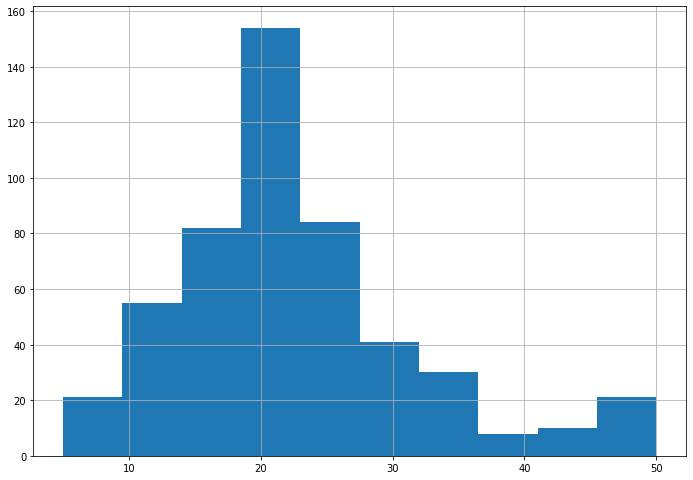

In [10]:
df.MEDV.hist()

### Relação entre variáveis

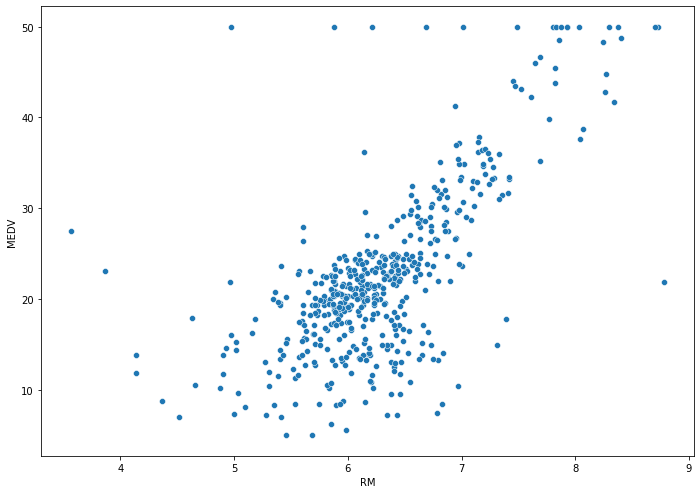

In [11]:
sns.scatterplot(data = df, x = 'RM', y = 'MEDV')

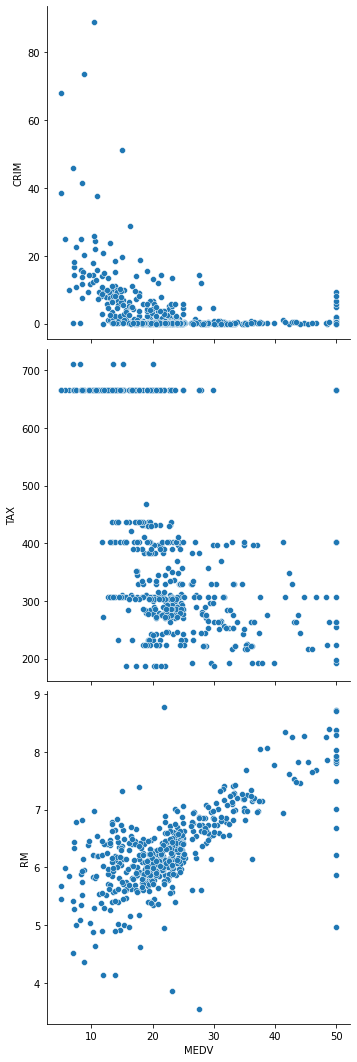

In [12]:
selected_features = ['CRIM', 'TAX', 'RM']
target = ['MEDV']

sns.pairplot(data = df, y_vars = selected_features, x_vars = target, height = 5)

## Correlação cruzada

In [13]:
df.corr().MEDV

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

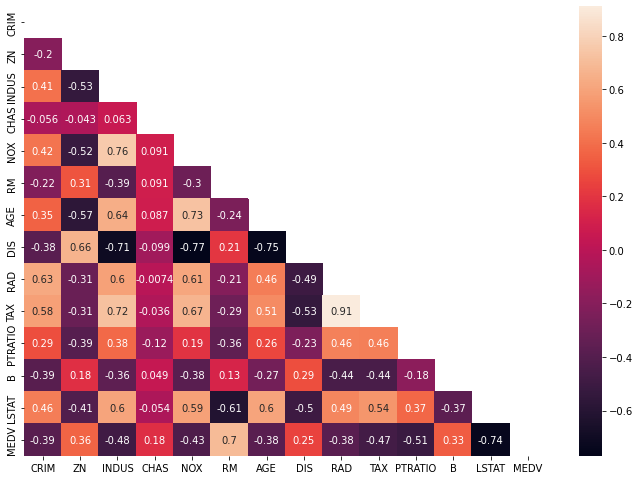

In [ ]:
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask = mask)

# Treinamento do modelo

Após nossa análise inicial, estamos prontos para de fato trabalhar com um modelo de regressão linear simples. Para isso, escolhemos a variável ```RM - average number of rooms per dwelling``` como nossa variável independente (```X```) por ter o maior de valor de correlação cruzada com o target, mas sem aparentar um comportamento não linear (caso do ```LSTAT```).

Para conseguirmos detectar se houve sobreajuste do modelo, utilizaremos a técnica de divisão do conjunto de dados em treino e validação. Apenas após essa divisão será feito o treinamento e os resultados serão analisados.

## Selecionando os features

In [15]:
X = df.RM.to_frame() # O modelo não aceita Series
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [17]:
y = df.MEDV
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Divisão treino - validação

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.2, random_state = 42)

## Treinamento

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

modelo = lr.fit(X_train, y_train)

Exibindo o modelo

In [30]:
np.set_printoptions(precision=1)

print(f"Modelo ajustado: y = {modelo.intercept_:.1f} + {modelo.coef_} X")

Modelo ajustado: y = -36.2 + [9.3] X


# Resultados finais

Agora que temos nosso modelo treinado, podemos verificar seus resultados utilizando ambos os conjuntos (treino e validação). Após isso, guardaremos o resultado em um arquivo ```.csv```

## Calculando as previsões

In [33]:
y_h_test = modelo.predict(X_test)
y_h_train = modelo.predict(X_train)

## Visualizando o modelo (ainda estamos em 2D)

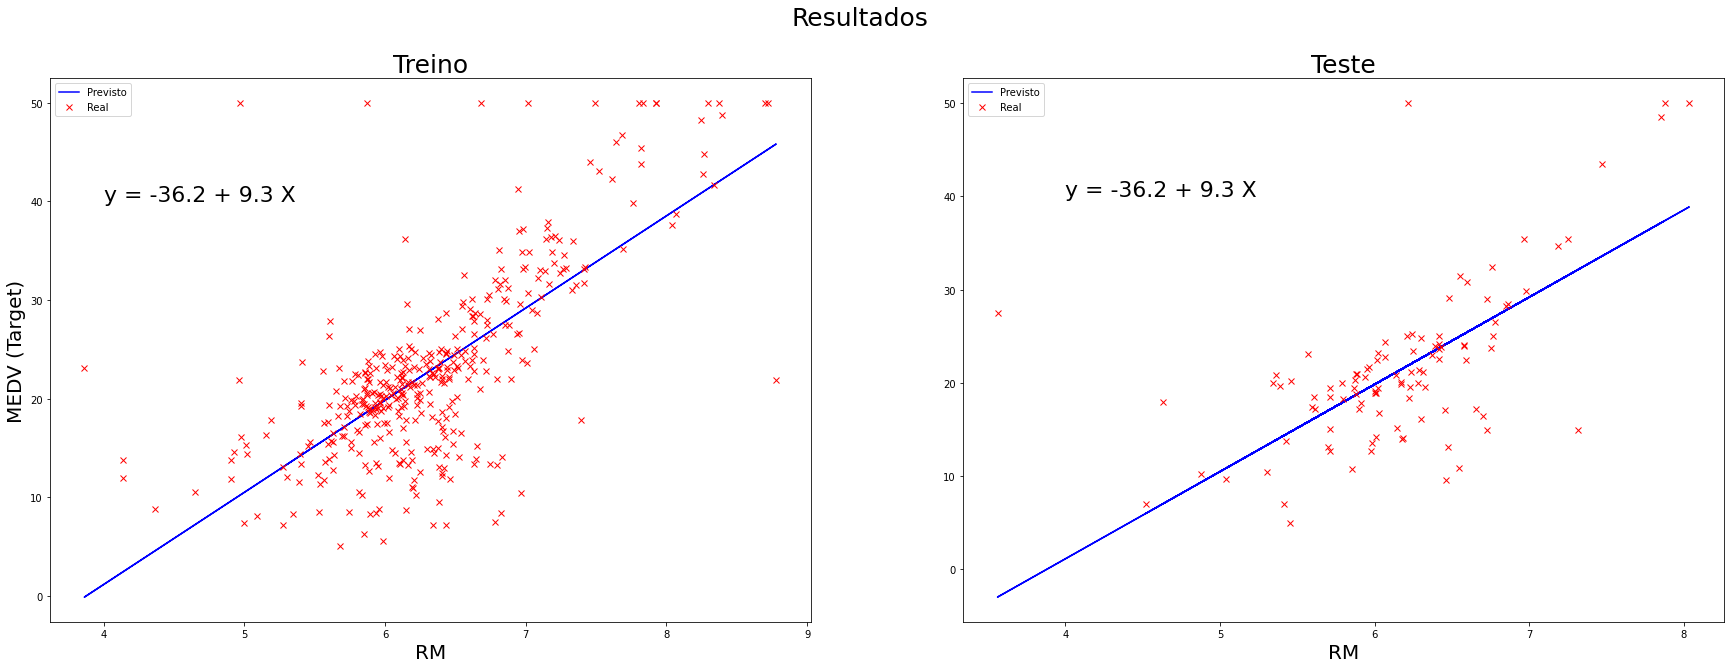

<Figure size 1440x720 with 0 Axes>

In [73]:
note = f"y = {modelo.intercept_:.1f} + {modelo.coef_[0]:.1f} X"

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 10)

fig.suptitle('Resultados', fontsize = 25)

plt.subplot(1, 2, 1)
plt.title("Treino", fontsize = 25)
plt.plot(X_train, y_h_train, 'b-', label = 'Previsto')
plt.plot(X_train, y_train, 'rx', label = 'Real')
plt.text(4, 40, note, fontsize = 22)
plt.legend(loc = 'best')
plt.ylabel("MEDV (Target)", fontsize = 20)
plt.xlabel("RM", fontsize = 20)

plt.subplot(1, 2, 2)
plt.title("Teste", fontsize = 25)
plt.plot(X_test, y_h_test, 'b-', label = 'Previsto')
plt.plot(X_test, y_test, 'rx', label = 'Real')
plt.text(4, 40, note, fontsize = 22)
plt.legend(loc = 'best')
plt.xlabel("RM", fontsize = 20)

plt.figure(figsize = (20, 10))
plt.show()

## Métricas para score

In [79]:
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error

r2_train = r2_score(y_train, y_h_train)
r2_test = r2_score(y_test, y_h_test)

max_train = max_error(y_train, y_h_train)
max_test = max_error(y_test, y_h_test)

mae_train = mean_absolute_error(y_train, y_h_train)
mae_test = mean_absolute_error(y_test, y_h_test)

mse_train = mean_squared_error(y_train, y_h_train)
mse_test = mean_squared_error(y_test, y_h_test)

print(f"Métrica\t\tTreino\t\tTeste")
print(f"R2\t\t{r2_train:.2f}\t\t{r2_test:.2f}")
print(f"Max\t\t{max_train:.2f}\t\t{max_test:.2f}")
print(f"MAE\t\t{mae_train:.2f}\t\t{mae_test:.2f}")
print(f"MSE\t\t{mse_train:.2f}\t\t{mse_test:.2f}")

Métrica		Treino		Teste
R2		0.51		0.37
Max		39.79		30.46
MAE		4.43		4.48
MSE		43.00		46.14


## Salvando os resultados em um arquivo csv

In [81]:
results = pd.DataFrame({'Resultados': y_h_test})

results.to_csv("resultados.csv")

,Resultados
0,23.732383
1,26.929502
2,19.684568
3,20.451129
4,22.619935
